# Generating feature stacks
Machine learning algorithms such as Random Forest Classifiers, e.g. as implemented in [APOC](https://github.com/haesleinhuepf/apoc) use feature stacks for pixel classification. Feature stacks are lists of images of the same size (2D or 3D). APOC brings a utility function for generating feature stacks. It takes an image and a feature specification string as input to produce a feature stack.

Let's start with loading an example image and making a convenience function for visualization:

In [1]:
from skimage.io import imread, imshow
import numpy as np
import apoc
import matplotlib.pyplot as plt

We start again with the blobs example image.

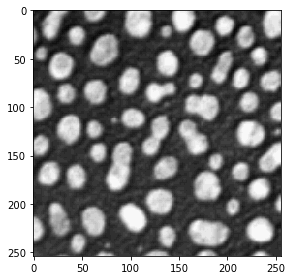

In [2]:
image = imread('../../data/blobs.tif')
imshow(image)

We furthermore define a utility function for visualizing feature stacks.

In [3]:
def visualize(feature_stack):
    """
    Shows lists of images in rows of three
    """
    if len(feature_stack) == 0:
        return
    
    # show feature images
    width = 3
    height = int(len(feature_stack) / 3)
    if height * width < len(feature_stack):
        height = height + 1    
    
    fig, axes = plt.subplots(height, width, figsize=(10,10))

    for i, f in enumerate(feature_stack):
        if height > 1:
            axes[int(i / 3)][i % 3].imshow(f, cmap=plt.cm.gray)
        else:
            axes[i].imshow(f, cmap=plt.cm.gray)

    w = len(feature_stack) % width
    if w > 0:
        w = width - w
        while (w > 0):
            if height > 1:
                axes[-1][width - w].set_visible(False)
            else:
                axes[width - w].set_visible(False)
            w = w - 1

    plt.show()        

## Feature stacks
A feature stack is a list of 2D or 3D images, typically derived from an original image. If you don't specify any feature specfication, a stack will be generated with the original image, a blurred version and an edge image:

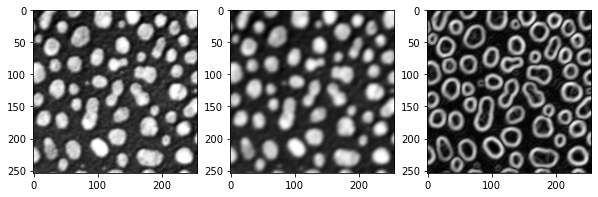

In [4]:
feature_stack = apoc.generate_feature_stack(image)

visualize(feature_stack)

There are also some pre-defined Feature sets:

PredefinedFeatureSet.custom
PredefinedFeatureSet.small_quick


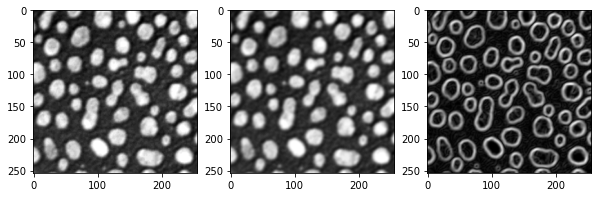

PredefinedFeatureSet.medium_quick


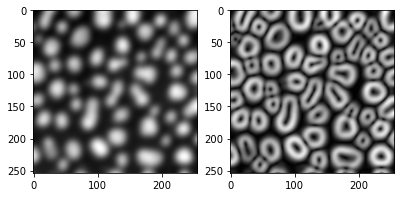

PredefinedFeatureSet.large_quick


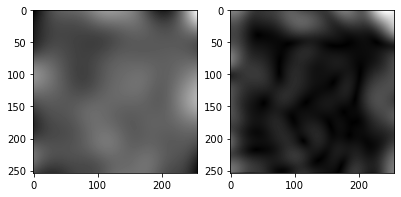

PredefinedFeatureSet.small_dog_log


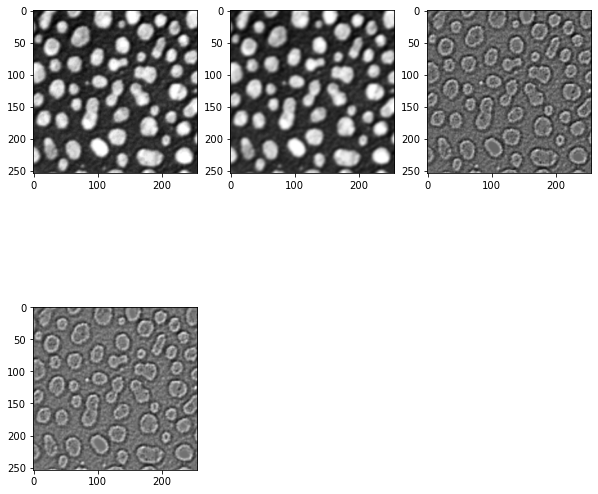

PredefinedFeatureSet.medium_dog_log


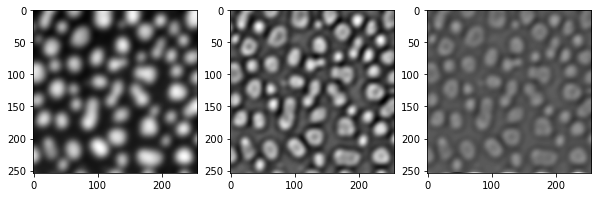

PredefinedFeatureSet.large_dog_log


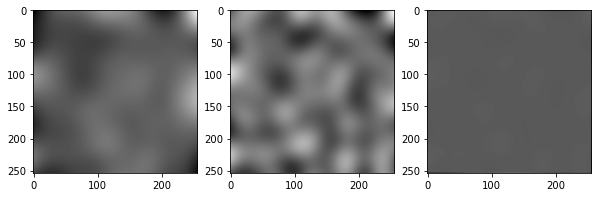

PredefinedFeatureSet.object_size_1_to_2_px


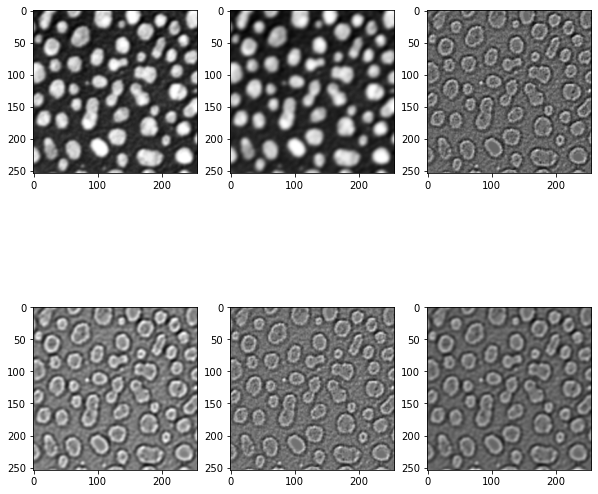

PredefinedFeatureSet.object_size_1_to_5_px


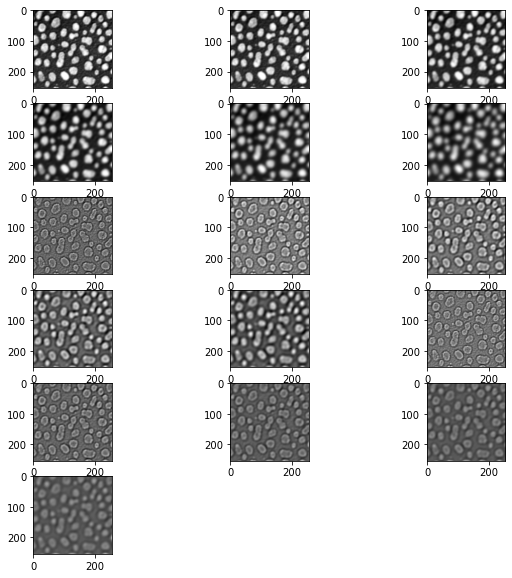

PredefinedFeatureSet.object_size_3_to_8_px


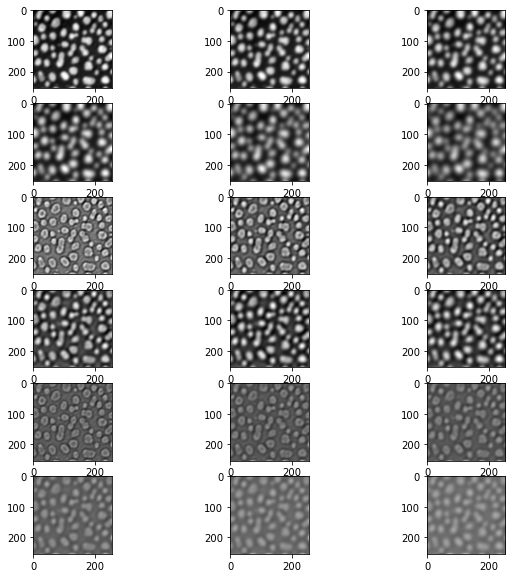

PredefinedFeatureSet.object_size_5_to_10_px


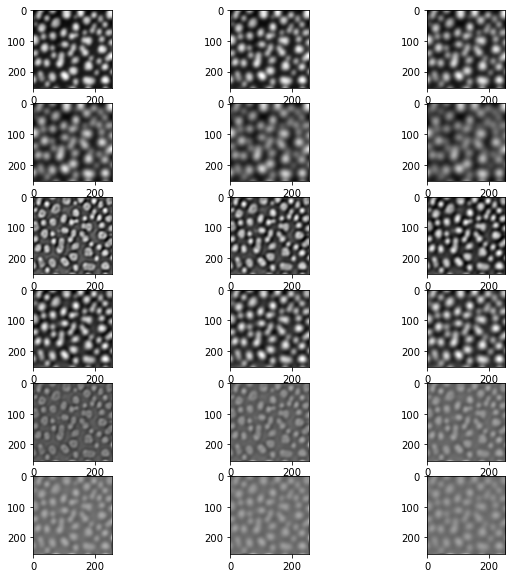

PredefinedFeatureSet.object_size_10_to_15_px


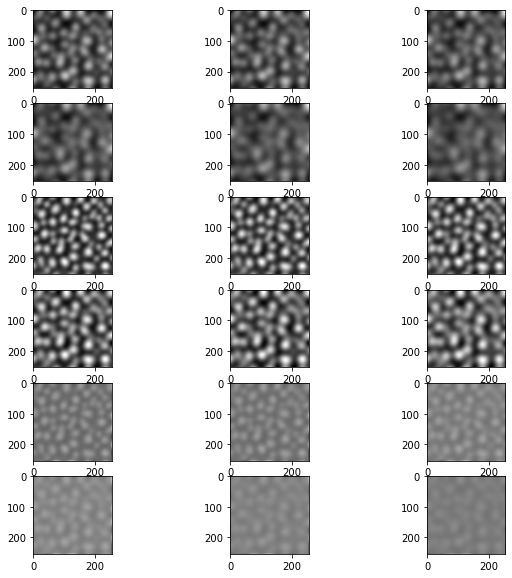

PredefinedFeatureSet.object_size_15_to_20_px


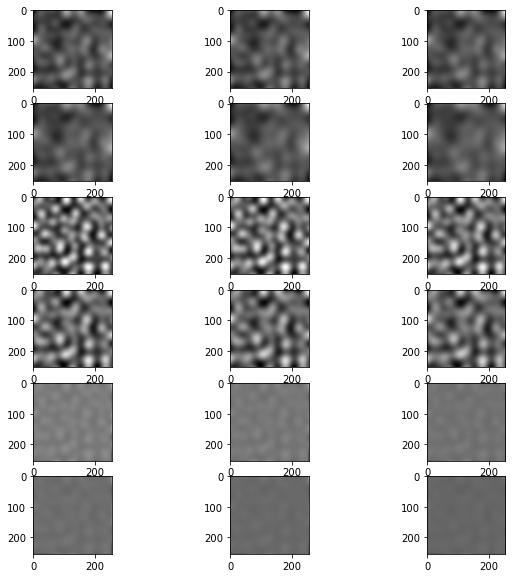

PredefinedFeatureSet.object_size_20_to_25_px


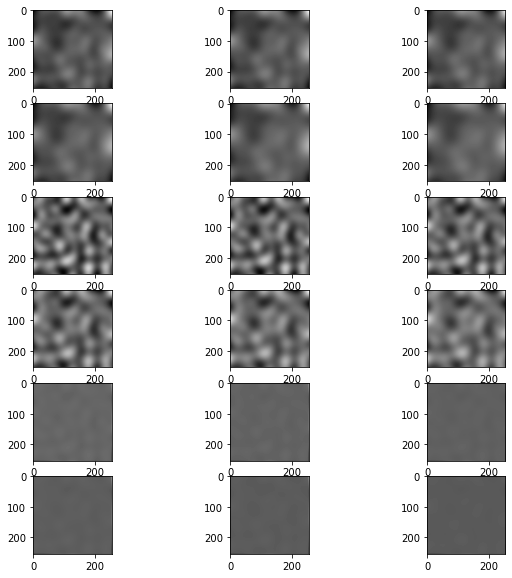

PredefinedFeatureSet.object_size_25_to_50_px


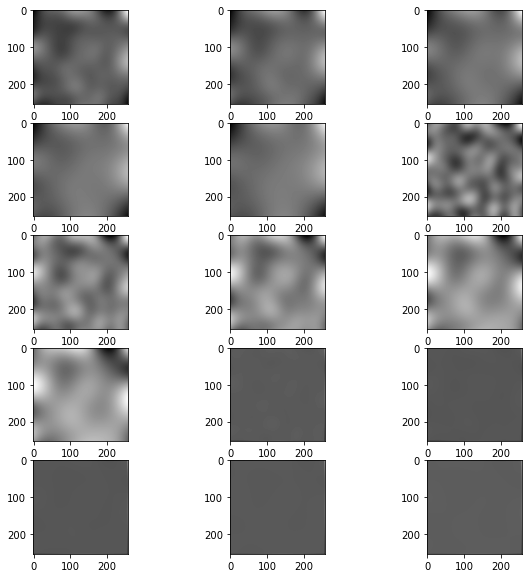

PredefinedFeatureSet.object_size_50_to_100_px


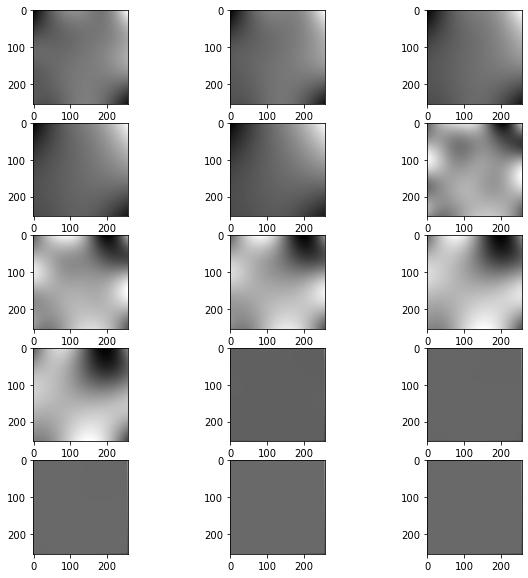

In [5]:
for f in apoc.PredefinedFeatureSet:
    print(f)
    visualize(apoc.generate_feature_stack(image, f))

## Custom feature definitions
You can furthermore, define specific features corresponding to [clesperanto filters](https://clij.github.io/clij2-docs/reference__pyclesperanto):

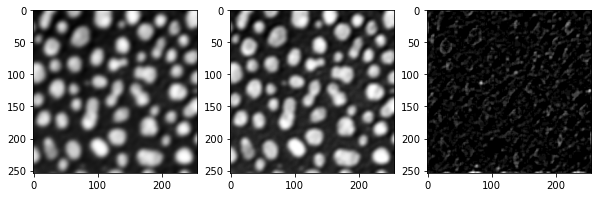

In [6]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=3 mean_box=3 top_hat_box=3")

visualize(feature_stack)

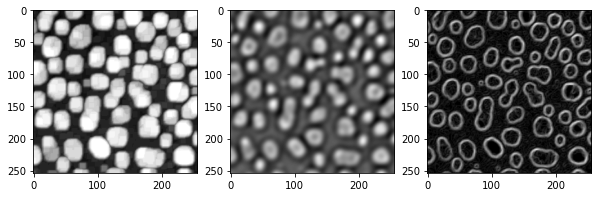

In [7]:
feature_stack = apoc.generate_feature_stack(image, "maximum_box=3 difference_of_gaussian=5 sobel=0")

visualize(feature_stack)

You can also vary radii / sigmas of the fetures:

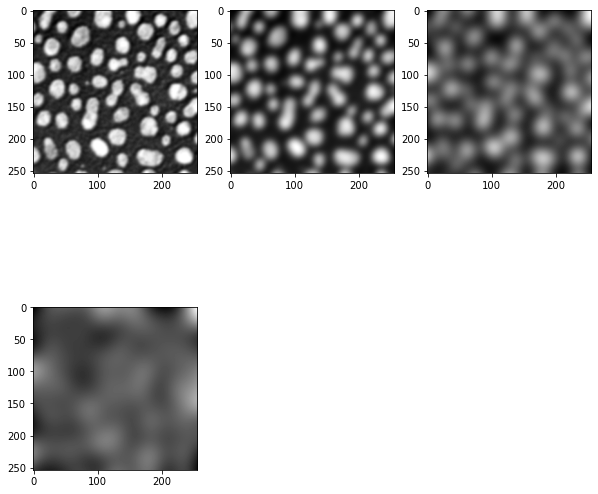

In [8]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=1 gaussian_blur=5 gaussian_blur=10 gaussian_blur=20")

visualize(feature_stack)

Furthermore, some features can be combined, for example you can compute the sobel of a Gaussian or a Laplacian of a Gaussian

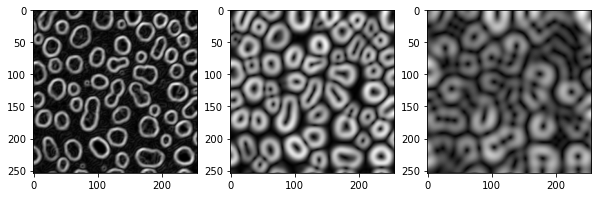

In [9]:
feature_stack = apoc.generate_feature_stack(image, "sobel_of_gaussian_blur=1 sobel_of_gaussian_blur=5 sobel_of_gaussian_blur=10")

visualize(feature_stack)

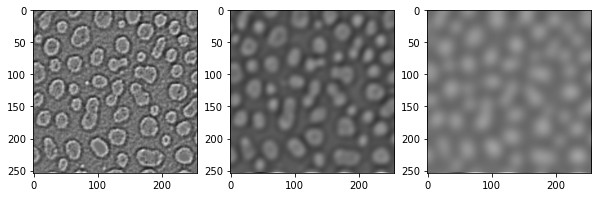

In [10]:
feature_stack = apoc.generate_feature_stack(image, "laplace_box_of_gaussian_blur=1 laplace_box_of_gaussian_blur=5 laplace_box_of_gaussian_blur=10")

visualize(feature_stack)